**DATA GATHERING**

In the data gathering phase, we first identified our project ideas through brainstorming. After deciding on a dataset that is related to education, we thought of what we want to do with the dataset. We decided on predicting the grades based on various factors such as studytime, health, and absences. After this, we search a dataset that relates to our project idea. We went and downloaded a dataset in Kaggle which contains a dataset that has the relevant information we wanted. After downloading the dataset, we uploaded it in our google collab and used the pandas method to read the dataset.

This is the dataset link: https://www.kaggle.com/datasets/devansodariya/student-performance-data

In [ ]:
#import the pandas and numpy library with variables pd and np correspondingly. stats is also imported from scipy.
#These libraries will be used althrougout the different phases to read, manipulate and train the data.
import pandas as pd
import numpy as np
from scipy import stats
#This library will be used later i the modelling phase to help with the training of the data to get to the results we wan to have
from sklearn.model_selection import train_test_split
import random
# Read the dataset into a DataFrame
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1M3f-2Dq6mCPD9lu8Crbt5bDBhp2Zatjg' -O student_data.csv

--2024-08-20 08:37:56--  https://docs.google.com/uc?export=download&id=1M3f-2Dq6mCPD9lu8Crbt5bDBhp2Zatjg
Resolving docs.google.com (docs.google.com)... 172.217.203.138, 172.217.203.101, 172.217.203.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1M3f-2Dq6mCPD9lu8Crbt5bDBhp2Zatjg&export=download [following]
--2024-08-20 08:37:56--  https://drive.usercontent.google.com/download?id=1M3f-2Dq6mCPD9lu8Crbt5bDBhp2Zatjg&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41983 (41K) [application/octet-stream]
Saving to: ‘student_data.csv’

student_data.csv    100%[===================>]  41.00K  --.-KB/s

In [ ]:
#Using pandas, we read the csv file containing the dataset for our project. We assign this dataset to a DataFrame called 'student'
student = pd.read_csv("student_data.csv")
student = pd.DataFrame(student)
student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
#Merge three grades by finding its average
grade_average = ['G1','G2','G3']
student_grade = student[grade_average]
student.loc[:, 'Average'] = student_grade.mean(axis=1)
student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,9.000000
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,15.333333
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,8.333333
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,11.000000


In [ ]:
student_numeric = student.select_dtypes(include=np.number)
student_numeric.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579,-0.134589
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147,0.224260
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457,0.175852
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142,-0.128197
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820,0.134565
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415,-0.375759
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363,0.021653
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307,0.003773
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791,-0.154511
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660,-0.072508


**CLEANSING DATA**

In cleansing the data from our dataset, we first looked through each column and identified the necessary columns to be used. We plan to extract these columns so that we would only have a dataset that contains the necessary information we need. After that, we plan on removing any outliers that we find from the data through looking at the data and identifying data that are irrelevant. We would also create an index field since there are no columns in the dataset that can be used for an index field. Finally, we merge columns that are related to one another, such as the G1, G2, and G3.




In [ ]:
#Extract and create a new table for necessary columns
columns_to_keep = ['health', 'studytime', 'absences','G1', 'G2', 'G3', 'Medu', 'Fedu']
student = student[columns_to_keep]
student

,health,studytime,absences,G1,G2,G3,Medu,Fedu
0,3,2,6,5,6,6,4,4
1,3,2,4,5,5,6,1,1
2,3,2,10,7,8,10,1,1
3,5,3,2,15,14,15,4,2
4,5,2,4,6,10,10,3,3
...,...,...,...,...,...,...,...,...
390,4,2,11,9,9,9,2,2
391,2,1,3,14,16,16,3,1
392,3,1,3,10,8,7,1,1
393,5,1,0,11,12,10,3,2


Now that we removed all the unnecessary columns in our dataset, we realized that there isn't a index field.

In [ ]:
#Adding an index field
#creating a copy to avoid duplications
student = student.copy()
#Creating an index starting with 1
student.loc[:, 'Student#'] = student.index.astype(int) + 1
#Formating the index like 000
student.loc[:, 'Student#'] = student['Student#'].apply(lambda x: '{0:03}'.format(x))
#setting the index in the dataframe
student.set_index('Student#', inplace=True)
student

,health,studytime,absences,G1,G2,G3,Medu,Fedu
Student#,,,,,,,,
001,3,2,6,5,6,6,4,4
002,3,2,4,5,5,6,1,1
003,3,2,10,7,8,10,1,1
004,5,3,2,15,14,15,4,2
005,5,2,4,6,10,10,3,3
...,...,...,...,...,...,...,...,...
391,4,2,11,9,9,9,2,2
392,2,1,3,14,16,16,3,1
393,3,1,3,10,8,7,1,1


Now with the index field in place, we can identify and differentiate easier each row in our dataset. However, in looking at our data, we realized how some students have 0 as a grade. We looked at the documentation made in gathering the data in this dataset and learned how there are students that dropped out that were still included. In predicting the grade, we find that dropouts would pose as an outlier which is why we decided to remove them from our dataset.


In [ ]:
#replacing students with grades 0 to NaN because they are drop outs
student = student.query('G1>0')
student = student.query('G2>0')
student = student.query('G3>0')
student

,health,studytime,absences,G1,G2,G3,Medu,Fedu
Student#,,,,,,,,
001,3,2,6,5,6,6,4,4
002,3,2,4,5,5,6,1,1
003,3,2,10,7,8,10,1,1
004,5,3,2,15,14,15,4,2
005,5,2,4,6,10,10,3,3
...,...,...,...,...,...,...,...,...
391,4,2,11,9,9,9,2,2
392,2,1,3,14,16,16,3,1
393,3,1,3,10,8,7,1,1


On the table above, we can see that the rows dropped from 395 to 357 which shows that we were able to remove the outliers (dropouts) from our dataset. Now we wanted to create new column by merging the data from G1, G2, and G3 to create a column representing their average


In [ ]:
#Merge three grades by finding its average
grade_average = ['G1','G2','G3']
student_grade = student[grade_average]
student.loc[:, 'Average'] = student_grade.mean(axis=1)
student

,health,studytime,absences,G1,G2,G3,Medu,Fedu,Average
Student#,,,,,,,,,
001,3,2,6,5,6,6,4,4,5.666667
002,3,2,4,5,5,6,1,1,5.333333
003,3,2,10,7,8,10,1,1,8.333333
004,5,3,2,15,14,15,4,2,14.666667
005,5,2,4,6,10,10,3,3,8.666667
...,...,...,...,...,...,...,...,...,...
391,4,2,11,9,9,9,2,2,9.000000
392,2,1,3,14,16,16,3,1,15.333333
393,3,1,3,10,8,7,1,1,8.333333


Because of how the dataset was gathered, we didn't have to convert any categorical data to numerical since the people who gathered this data took it upon themselves to use numerical data for each of the columns we used. So, we are now done cleaning the dataset

**Exploratory Data Analysis**

General Problem Statement

What factors are strongly associated with student performance in terms of grades?

Data Science Questions
1. what are the students' next grades using your current grades?
2. What are the students' grades based on strongly associated factors to students performance?
3. Does student health have a significant impact towards their academic performance?

Through our **data inspection**, we realized how the data has numbers without meaning behind it. So we changed the numerical data of the column ‘health’ which is 1-5 to categorical data which is now ‘Very Bad’ to ‘Very Good’ to make it easier to understand and easier to visualize.
We also changed the numerical data of the column ‘Average’ to categorical data    which is now Failure, Poor, Proficient, and Excellent. Failure is from the average of 0-6. Poor is from the average of 7-11. Proficient is from the average of 12-16. Excellent is from the average of 17-21.

In [ ]:
student_categorical = student

dict_health = {"health_category": {1:"Very Bad", 2:"Bad", 3:"Okay", 4:"Good", 5:"Very Good"}}
dict_study = {"studytime_category": {1:"<2hrs", 2:"2-5hrs", 3:"5-10hrs", 4:">10hrs"}}
student_categorical.loc[:, 'health_category'] = student['health']
student_categorical.loc[:, 'studytime_category'] = student['studytime']
student_categorical.replace(dict_health, inplace=True)
student_categorical.replace(dict_study, inplace=True)

bin_edges = [0, 6, 11, 16, 21]
bin_names = ['Failure', 'Poor', 'Profecient', 'Excellent']
student_categorical.loc[:, 'School Performance'] = pd.cut(student_categorical['Average'], bin_edges, labels = bin_names)

bin_edges2 = [0, 1, 6, 15, 51]
bin_names2 = ['No absence', 'Rarely absent', 'Occasional absence', 'Always absent']
student_categorical.loc[:, 'absence_categorical'] = pd.cut(student_categorical['absences'], bin_edges2, labels = bin_names2)

In [ ]:
student_categorical

,health,studytime,absences,G1,G2,G3,Medu,Fedu,Average,health_category,studytime_category,School Performance,absence_categorical
Student#,,,,,,,,,,,,,
001,3,2,6,5,6,6,4,4,5.666667,Okay,2-5hrs,Failure,Rarely absent
002,3,2,4,5,5,6,1,1,5.333333,Okay,2-5hrs,Failure,Rarely absent
003,3,2,10,7,8,10,1,1,8.333333,Okay,2-5hrs,Poor,Occasional absence
004,5,3,2,15,14,15,4,2,14.666667,Very Good,5-10hrs,Profecient,Rarely absent
005,5,2,4,6,10,10,3,3,8.666667,Very Good,2-5hrs,Poor,Rarely absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,4,2,11,9,9,9,2,2,9.000000,Good,2-5hrs,Poor,Occasional absence
392,2,1,3,14,16,16,3,1,15.333333,Bad,<2hrs,Profecient,Rarely absent
393,3,1,3,10,8,7,1,1,8.333333,Okay,<2hrs,Poor,Rarely absent


The next step is **correlating the variable** through using the Pearson Correlation Coefficient as an indication how correlated each variables are to each other

In [ ]:
from scipy.stats import pearsonr

# load your data into x and y
x = student['health']
y = student['Average']

corr, p = pearsonr(x, y)
print("Pearson Correlation Coefficient:", corr)

Pearson Correlation Coefficient: -0.07336052994126961


A correlation coefficient of -0.07336052994126961 is a very small negative value close to zero, it means that there is a weak negative linear relationship between the two variables, indicating that as one variable increases, the other variable decreases, but the relationship is not very strong. The closer the correlation coefficient is to 1 or -1, the stronger the relationship between the variables is.

In [ ]:
student_numeric = student.select_dtypes(include=np.number)
student_numeric.corr()

,health,studytime,absences,G1,G2,G3,Medu,Fedu,Average
health,1.000000,-0.072786,-0.029116,-0.072126,-0.059990,-0.081691,-0.043790,0.009127,-0.073361
studytime,-0.072786,1.000000,-0.074541,0.140638,0.119759,0.126728,0.055764,-0.028631,0.132746
absences,-0.029116,-0.074541,1.000000,-0.120313,-0.199546,-0.213129,0.075924,0.008948,-0.182365
G1,-0.072126,0.140638,-0.120313,1.000000,0.901940,0.891805,0.172444,0.162752,0.957640
G2,-0.059990,0.119759,-0.199546,0.901940,1.000000,0.965583,0.203288,0.178706,0.982121
G3,-0.081691,0.126728,-0.213129,0.891805,0.965583,1.000000,0.190308,0.158811,0.978907
Medu,-0.043790,0.055764,0.075924,0.172444,0.203288,0.190308,1.000000,0.608327,0.193809
Fedu,0.009127,-0.028631,0.008948,0.162752,0.178706,0.158811,0.608327,1.000000,0.171312
Average,-0.073361,0.132746,-0.182365,0.957640,0.982121,0.978907,0.193809,0.171312,1.000000


For example, the correlation of ‘absences’ and ‘Average’ is -0.182365. The negative value means that Absences and Average is negatively correlated, meaning that as the absences of a student goes down, the Average goes up. This is also the same case vice versa. The value -0.18 means that their negative correlation is not that strong.

Because of how we conducted the data cleansing, we already done with the **Feature Extraction** because we extracted all the columns we needed for the project idea we have which are the health, studytime, absences, G1, G2, and G3 to be used in model for predicting the grade. The table above shows the correlation of each variable to each other.

Below, **data visualization** is conducted to the the distribution of data across different categories. A cross-tabulation is done with a bar graph to visualize the data. Furthermore, a normalized crosstab or relative frequency table is created to see the proportion of the distribution of data rather than its raw count to easily visualize and see the patterns and trends. Finally, a contingency table is created to see the raw count of the data aswell as the relative frequency table to see the proportions of the raw count.

It is important to visualize these data because the project objective revolves around the discovery of the factors that affect the academic performance of a student. These variables being shown in tabular and graphical form are necessary to derive a conclusion on our general problem statement and third data science question



<Axes: xlabel='School Performance'>

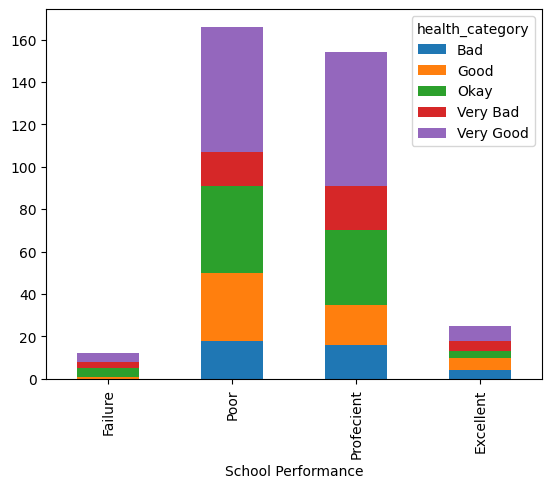

In [ ]:
#Creates a cross-tabulation between school performace and health category
crosstab_01 = pd.crosstab(student_categorical['School Performance'], student_categorical['health_category'])
#creates a bar graph for the cross-tabulation
crosstab_01.plot(kind='bar', stacked =True)

For the relationship between health and school performance, we could see in this table that many of the "Very Good" health students performed poorly and profecient. However, it is hard to determine any patterns or trens because of the disproportion between each category.

<Axes: xlabel='School Performance'>

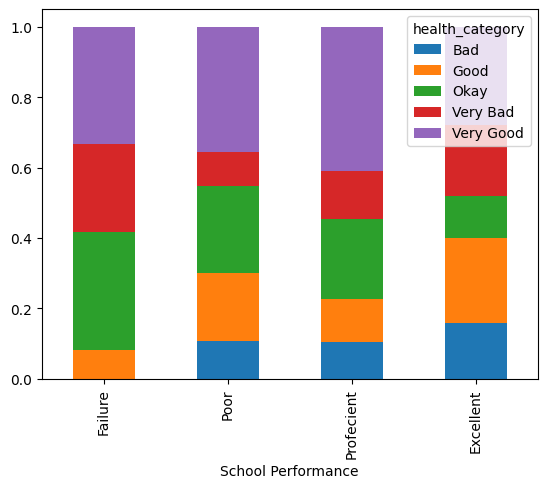

In [ ]:
#Creates a normalized cross tabulation
crosstab_norm1 = crosstab_01.div(crosstab_01.sum(1), axis=0)
#Creates a bar graph for the normalized cross tabulation
crosstab_norm1.plot(kind='bar', stacked =True)

In this normalized bar graph, we could observe that the very good health is close to being evenly distributed between each category.However, we could see the red which indicates the "Very Bad" health, shows an increase whenever students' school performance lies around the failing or excellent.

In [ ]:
#Creates a cross tabulation
crosstab_01

health_category,Bad,Good,Okay,Very Bad,Very Good
School Performance,,,,,
Failure,0,1,4,3,4
Poor,18,32,41,16,59
Profecient,16,19,35,21,63
Excellent,4,6,3,5,7


In this cross-tabulation, we can observe the raw numbers for each category. Most of the students are either in the "Very Good" or "Okay" health category within either the "Poor" or "Profecient" school performance category.

In [ ]:
#Creates a contingency table
crosstab_cont = round(crosstab_01.div(crosstab_01.sum(0),axis = 1)*100, 1)
crosstab_cont

health_category,Bad,Good,Okay,Very Bad,Very Good
School Performance,,,,,
Failure,0.0,1.7,4.8,6.7,3.0
Poor,47.4,55.2,49.4,35.6,44.4
Profecient,42.1,32.8,42.2,46.7,47.4
Excellent,10.5,10.3,3.6,11.1,5.3


In this table, we can see the percentage of the proportion for the raw numbers, although it is harder to visualize this compared to the graph earlier.

Below, similar processes were applied, so to make the discussion more impactful, we decided to explain our observations on the graphs and tables instead.

<Axes: xlabel='School Performance'>

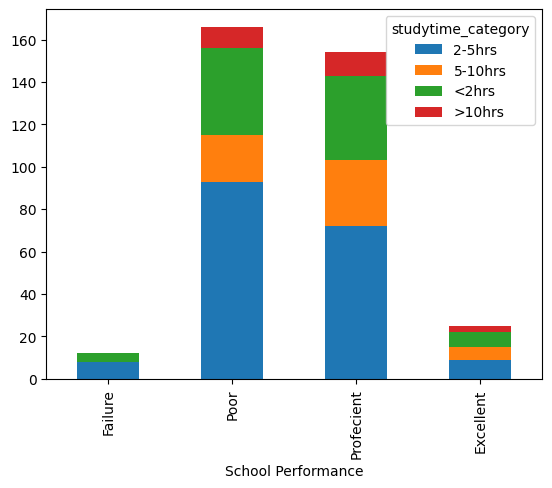

In [ ]:
crosstab_02 = pd.crosstab(student_categorical['School Performance'], student_categorical['studytime_category'])

crosstab_02.plot(kind='bar', stacked =True)

Majority of students studied 2-5 hours a day

<Axes: xlabel='School Performance'>

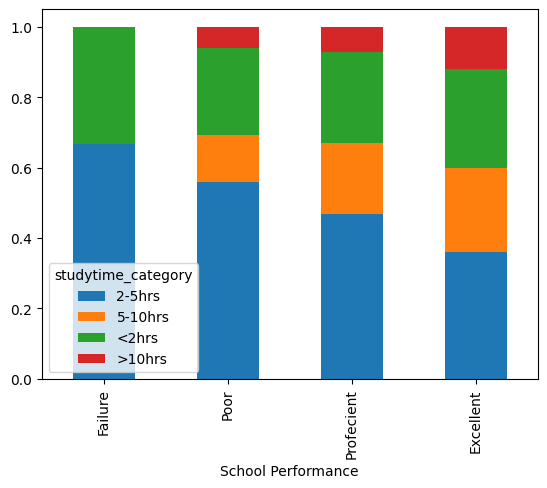

In [ ]:
crosstab_norm2 = crosstab_02.div(crosstab_02.sum(1), axis=0)
crosstab_norm2.plot(kind='bar', stacked =True)

We can observe that the more students study, the higher their school performance get. We can see a trend of the red and orange, which is more than 10 hours and 5-10 hours of studying, increase whenever their school performance also increase.

In [ ]:
crosstab_02

studytime_category,2-5hrs,5-10hrs,<2hrs,>10hrs
School Performance,,,,
Failure,8,0,4,0
Poor,93,22,41,10
Profecient,72,31,40,11
Excellent,9,6,7,3


In [ ]:
crosstab_cont = round(crosstab_02.div(crosstab_02.sum(0),axis = 1)*100, 1)
crosstab_cont

studytime_category,2-5hrs,5-10hrs,<2hrs,>10hrs
School Performance,,,,
Failure,4.4,0.0,4.3,0.0
Poor,51.1,37.3,44.6,41.7
Profecient,39.6,52.5,43.5,45.8
Excellent,4.9,10.2,7.6,12.5


<Axes: xlabel='School Performance'>

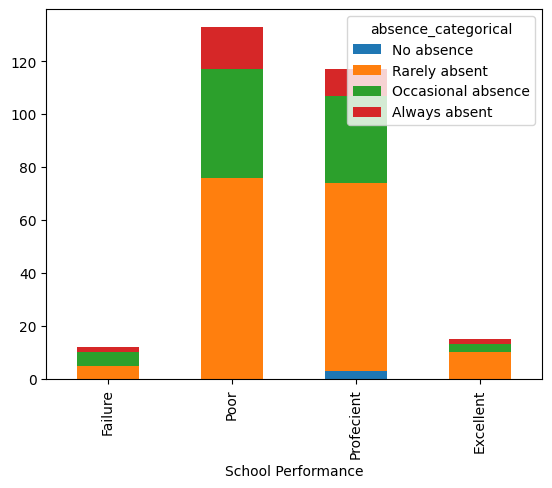

In [ ]:
crosstab_03 = pd.crosstab(student_categorical['School Performance'], student_categorical['absence_categorical'])

crosstab_03.plot(kind='bar', stacked =True)

We can observe that most students are rarely absent

<Axes: xlabel='School Performance'>

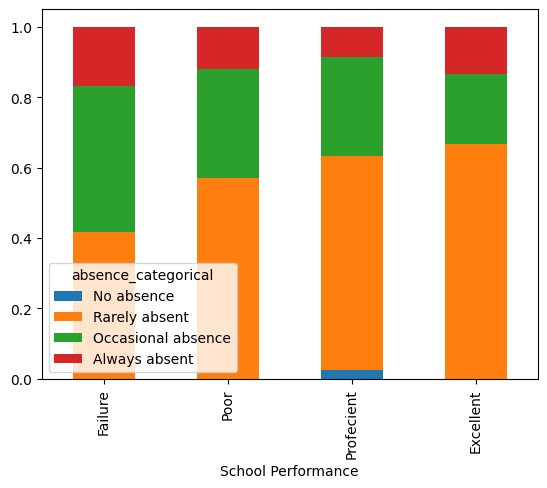

In [ ]:
crosstab_norm3 = crosstab_03.div(crosstab_03.sum(1), axis=0)
crosstab_norm3.plot(kind='bar', stacked =True)

We can see a trend of the rarely absent students get higher as school performance gets better. On the other hand, the occasional absent students goes lower as school performance gets better.

In [ ]:
crosstab_03

absence_categorical,No absence,Rarely absent,Occasional absence,Always absent
School Performance,,,,
Failure,0,5,5,2
Poor,0,76,41,16
Profecient,3,71,33,10
Excellent,0,10,3,2


In [ ]:
crosstab_cont = round(crosstab_03.div(crosstab_03.sum(0),axis = 1)*100, 1)
crosstab_cont

absence_categorical,No absence,Rarely absent,Occasional absence,Always absent
School Performance,,,,
Failure,0.0,3.1,6.1,6.7
Poor,0.0,46.9,50.0,53.3
Profecient,100.0,43.8,40.2,33.3
Excellent,0.0,6.2,3.7,6.7


**Modelling**

We used the Linear Regression model because the value we are trying to predict is continuous. The Linear Regression Model is also a good model for predicting values about the dependent variable that we are using which is the average of Grades 2 and 3, using the independent variables studytime, absences, health, and G1 as a basis.

We also chose the variables studytime, absences, health, G1, G2, and G3 because it fits our data science questions.

**Predict the average of grades based on multiple factors (study time, absences, health)**

In [ ]:
#These are the libraries needed for the entire modelling of our dataset

from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind

In [ ]:
# This are the columns we used for creating the baseline model, these are the predictor variables
best_corr = ['studytime','absences','health', 'G1']

In [ ]:
# This is for averaging our target variables Grade 2 and 3
averageofG2and3 = ['G2','G3']
student_grade2n3 = student[averageofG2and3]

# This is the new column for the average of Grade 2 and 3
student['G2+3'] = student_grade2n3.mean(axis=1)

In [ ]:
# Saving the predictor variables to the variable X
X=student[best_corr]

# Saving the target variable to the variable Y
Y=student['G2+3']

# Splitting the varaibles to training and testing data sets with the split 70/30 (70 for training, 30 for testing)
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=7,shuffle=True)

In [ ]:
# Turning our testing and training datasets to DataFrame to make use of a histogram
traintest = pd.DataFrame({'Partition':['X_Train', 'X_Test','Y_Train', 'Y_Test'],
                  'Portion':[(X_train.shape[0]/student.shape[0]),
                             (X_test.shape[0]/student.shape[0]),
                             (Y_train.shape[0]/student.shape[0]),
                             (Y_test.shape[0]/student.shape[0])]
                  })

<Axes: xlabel='Partition'>

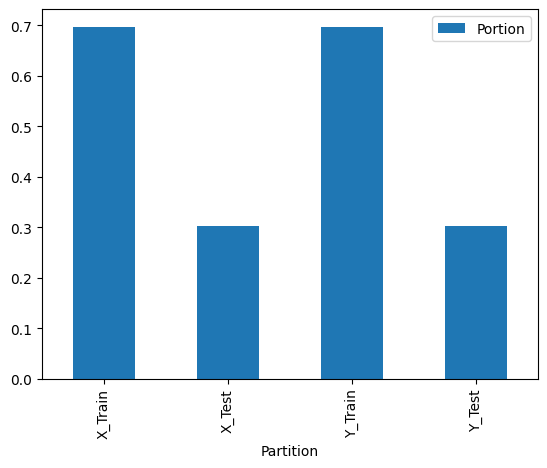

In [ ]:
# Checking if the Training and Testing split is correct (70/30 split)
traintest.set_index('Partition').plot(kind='bar')

In [ ]:
# Checking if the training and testing set is balanced, meaning if there is no significant differences between the two
t, p = ttest_ind(X_train, X_test)
print("t-statistic: ", t)
print("p-value: ", p)

t-statistic:  [ 1.04412949  0.32585439 -0.63245992  0.17903183]
p-value:  [0.29713595 0.74472651 0.52749352 0.85801485]


In [ ]:
# Checking if the training and testing set is balanced, meaning if there is no significant differences between the two
t, p = ttest_ind(Y_train, Y_test)
print("t-statistic: ", t)
print("p-value: ", p)

t-statistic:  0.0963830306779148
p-value:  0.9232707560993769


In [ ]:
# Training the model using Linear Regression
model1 = LinearRegression()
model1.fit(X_train,Y_train)

# These are the predictions of the model
pred1 = model1.predict(X_test)

In [ ]:
# These are the results of the predictions for the Model 1 or Baseline Model
print(pred1)

[10.35082994 11.273971    6.88977304 11.0094717  12.19257172 12.22833097
 14.33257871  7.99016938 11.10988927  6.08376927 14.14314405 11.06017758
 13.83447253 13.99954844  8.71933544 13.2125842   8.88441135  9.11702404
 10.52453908 14.73226065 11.07413003 11.25902436  8.65744436  9.47839477
 15.69116094  9.64247649 11.22326512  9.39192965  8.01552232  9.69218819
 13.67393696 11.0094717  14.94449628 17.17252618 15.72791437  7.46858957
  9.61712355  9.31863809  8.15812375 12.1943448   9.54560507  8.94154183
 13.11571278  6.99196369 13.90776409  7.8129141   9.30468563  9.74289407
  7.96481644 12.07820169 15.28871175 11.31150332 10.55067091 10.42589458
  8.86946471 14.70790189 10.78250472 17.25445097  9.15455636 10.17534774
 13.05204862 13.31001426 13.94629059 14.65819019 13.12611908 10.5620714
 14.54459906  7.65060544  8.78498795 15.65107666  9.38240848 11.32113073
 16.44567994  8.65921744 10.58742434 11.45985951 12.2432776  12.9551772
 15.73732649 13.16187832 13.10176032 13.9846018  14.7

In [ ]:
# This is the evaluation of the model using Mean Squared Error,
# Root Mean Squared Error, and R-squared for the Accuracy
print(f'MSE: {metrics.mean_squared_error(Y_test,pred1)}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, pred1))}')
print(f'Accuracy: {round(r2_score(Y_test , pred1),3)*100}%')
# Renamed the R-squared variable to Accuracy to make it easier to understand
# We also modified it's valiable to a percentage for easier visualization


MSE: 1.546612040982713
RMSE: 1.2436285783877408
Accuracy: 83.3%


**Predict the average of grades based on self-reported study time**

In [ ]:
# This are the columns we used for creating the second model, these are the predictor variables
stud_time = ['studytime','G1']

In [ ]:
# Saving the predictor variables to the variable X
X=student[stud_time]

# Saving the target variable to the variable Y
Y=student['G2+3']

# Splitting the varaibles to training and testing data sets with the split 70/30 (70 for training, 30 for testing)
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=7,shuffle=True)

In [ ]:
# Checking if the training and testing set is balanced, meaning if there is no significant differences between the two
t, p = ttest_ind(X_train, X_test)
print("t-statistic: ", t)
print("p-value: ", p)

t-statistic:  [1.04412949 0.17903183]
p-value:  [0.29713595 0.85801485]


In [ ]:
# Checking if the training and testing set is balanced, meaning if there is no significant differences between the two
t, p = ttest_ind(Y_train, Y_test)
print("t-statistic: ", t)
print("p-value: ", p)

t-statistic:  0.0963830306779148
p-value:  0.9232707560993769


In [ ]:
# Training the model using Linear Regression
model2 = LinearRegression()
model2.fit(X_train,Y_train)

# These are the predictions of the model
pred2 = model2.predict(X_test)

In [ ]:
# These are the results of the predictions for Model 2
print(pred2)

[10.33202024 11.1855749   6.86992126 11.20153501 12.07104979 12.0870099
 14.663634    7.7075158  11.20153501  5.98444637 14.67959411 11.20153501
 13.81007934 13.79411922  8.6089508  12.95652467  8.59299069  9.46250546
 10.34798035 14.663634   11.1855749  11.20153501  8.6089508   9.47846558
 15.53314877  9.46250546 11.1855749   9.46250546  7.7075158   9.46250546
 13.79411922 11.20153501 14.67959411 17.25621821 15.54910888  8.6089508
  9.46250546  9.44654535  8.59299069 12.05508967  9.43058524  9.46250546
 12.92460445  6.85396114 13.82603945  7.72347592  9.46250546  9.46250546
  7.7075158  12.0870099  15.54910888 11.1855749  10.33202024 10.33202024
  8.6089508  14.663634   11.21749513 17.30409855  9.46250546 10.33202024
 12.94056456 13.81007934 13.82603945 14.663634   12.94056456 10.34798035
 14.663634    7.72347592  8.59299069 15.565069   11.20153501 11.21749513
 16.43458377  8.59299069 10.34798035 11.20153501 12.07104979 12.90864433
 15.565069   12.95652467 12.94056456 13.81007934 14.6

In [ ]:
# This is the evaluation of the model using Mean Squared Error,
# Root Mean Squared Error, and R-squared for the Accuracy
print(f'MSE: {metrics.mean_squared_error(Y_test,pred2)}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, pred2))}')
print(f'Accuracy: {round(r2_score(Y_test , pred2),3)*100}%')
# Renamed the R-squared variable to Accuracy to make it easier to understand
# We also modified it's valiable to a percentage for easier visualization


MSE: 1.6689386241473305
RMSE: 1.2918740744156647
Accuracy: 82.0%


**Predict the average of grades based on self-reported absences**

In [ ]:
# This are the columns we used for creating the third model, these are the predictor variables
absences = ['absences','G1']

In [ ]:
# Saving the predictor variables to the variable X
X=student[absences]

# Saving the target variable to the variable Y
Y=student['G2+3']

# Splitting the varaibles to training and testing data sets with the split 70/30 (70 for training, 30 for testing)
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=7,shuffle=True)

In [ ]:
# Checking if the training and testing set is balanced, meaning if there is no significant differences between the two
t, p = ttest_ind(X_train, X_test)
print("t-statistic: ", t)
print("p-value: ", p)

t-statistic:  [0.32585439 0.17903183]
p-value:  [0.74472651 0.85801485]


In [ ]:
# Checking if the training and testing set is balanced, meaning if there is no significant differences between the two
t, p = ttest_ind(Y_train, Y_test)
print("t-statistic: ", t)
print("p-value: ", p)

t-statistic:  0.0963830306779148
p-value:  0.9232707560993769


In [ ]:
# Training the model using Linear Regression
model3 = LinearRegression()
model3.fit(X_train,Y_train)

# These are the predictions of the model
pred3 = model3.predict(X_test)

In [ ]:
# These are the results of the predictions for Model 3
print(pred3)

[10.36051798 11.29270802  6.89051299 10.99698781 12.22489806 12.22489806
 14.35609772  8.00752816 11.07091786  6.06921803 14.13430757 10.99698781
 13.86748799 14.01534809  8.71792805 13.1570881   8.86578815  9.13260773
 10.47141305 14.79967803 11.07091786 11.29270802  8.60703297  9.42832793
 15.73186807  9.65011809 11.29270802  9.42832793  8.00752816  9.72404814
 13.71962788 10.99698781 14.87360808 17.22659789 15.65793802  7.46111718
  9.65011809  9.39136291  8.20041769 12.26186308  9.65011809  8.98474763
 13.1570881   7.00140807 13.90445301  7.82270303  9.31743286  9.72404814
  8.00752816 12.07703796 15.32525279 11.32967304 10.58230813 10.43444803
  8.86578815 14.72574798 10.73823263 17.22659789  9.16957276 10.21265787
 13.009228   13.27604758 13.86748799 14.65181792 13.1570881  10.50837808
 14.6148529   7.6378779   8.71792805 15.54704294  9.44445674 11.21877797
 16.44226796  8.643998   10.50837808 11.44056812 12.22489806 13.009228
 15.73186807 13.1570881  13.08315805 14.01534809 14.7

In [ ]:
# This is the evaluation of the model using Mean Squared Error,
# Root Mean Squared Error, and R-squared for the Accuracy
print(f'MSE: {metrics.mean_squared_error(Y_test,pred3)}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, pred3))}')
print(f'Accuracy: {round(r2_score(Y_test , pred3),3)*100}%')
# Renamed the R-squared variable to Accuracy to make it easier to understand
# We also modified it's valiable to a percentage for easier visualization


MSE: 1.5483918030329988
RMSE: 1.2443439247382528
Accuracy: 83.3%


**Predict the average of grades based on self-reported health**

In [ ]:
# This are the columns we used for creating the fourth model, these are the predictor variables
health = ['health','G1']

In [ ]:
# Saving the predictor variables to the variable X
X=student[health]

# Saving the target variable to the variable Y
Y=student['G2+3']

# Splitting the varaibles to training and testing data sets with the split 70/30 (70 for training, 30 for testing)
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=7,shuffle=True)

In [ ]:
# Checking if the training and testing set is balanced, meaning if there is no significant differences between the two
t, p = ttest_ind(X_train, X_test)
print("t-statistic: ", t)
print("p-value: ", p)

t-statistic:  [-0.63245992  0.17903183]
p-value:  [0.52749352 0.85801485]


In [ ]:
# Checking if the training and testing set is balanced, meaning if there is no significant differences between the two
t, p = ttest_ind(Y_train, Y_test)
print("t-statistic: ", t)
print("p-value: ", p)

t-statistic:  0.0963830306779148
p-value:  0.9232707560993769


In [ ]:
# Training the model using Linear Regression
model4 = LinearRegression()
model4.fit(X_train,Y_train)

# These are the predictions of the model
pred4 = model4.predict(X_test)

In [ ]:
# These are the results of the predictions for Model 4
print(pred4)

[10.32978833 11.20281461  6.85050009 11.20281461 12.06302402 12.06302402
 14.67783057  7.72779866 11.2070869   5.99029068 14.67783057 11.2113592
 13.80053199 13.80907658  8.58800806 12.94032259  8.59655265  9.46103434
 10.33406062 14.66928598 11.2070869  11.19427003  8.59655265  9.46530663
 15.54231226  9.46103434 11.19427003  9.45676205  7.73207095  9.45676205
 13.80480429 11.20281461 14.68637515 17.28409253 15.55512914  8.59228035
  9.45676205  9.45676205  8.58800806 12.06302402  9.45676205  9.45676205
 12.9360503   6.85477238 13.80053199  7.72352637  9.46103434  9.46530663
  7.72352637 12.06302402 15.53803997 11.20281461 10.32551604 10.32978833
  8.58800806 14.67783057 11.20281461 17.27982024  9.46103434 10.32551604
 12.94459488 13.81334887 13.81334887 14.68210286 12.93177801 10.33406062
 14.66928598  7.72779866  8.60509723 15.55512914 11.19427003 11.2113592
 16.40679396  8.59655265 10.33833292 11.20281461 12.0715686  12.94032259
 15.53803997 12.93177801 12.94032259 13.80053199 14.6

In [ ]:
# This is the evaluation of the model using Mean Squared Error,
# Root Mean Squared Error, and R-squared for the Accuracy
print(f'MSE: {metrics.mean_squared_error(Y_test,pred4)}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, pred4))}')
print(f'Accuracy: {round(r2_score(Y_test , pred4),3)*100}%')
# Renamed the R-squared variable to Accuracy to make it easier to understand
# We also modified it's valiable to a percentage for easier visualization


MSE: 1.6682278956513765
RMSE: 1.2915989685855964
Accuracy: 82.0%


In creating a baseline and the new models, the same algorithm is used. This is intentionally done as the goal of the project coincides with comparing different configurations or parameter settings of the same algorithm.The algorithm is a commonly used and well-established method for the problem we are trying to solve, and it's considered as a good starting point. Finally the algorithm has already been shown to perform well on similar datasets.

**Evaluation**

Since we now gathered all the necessary information  we can now answer our data science questions and general problem statement. We can do this by interpreting the model results. We will also discuss the useful findings we gathered from our data modelling and derive insights and conclusions from it.

**Codes for model results**

The results below are the predicted values of Models 1, 2, 3, and 4. print(pred1) is the result of Model 1, print(pred2) is the result of Model 2, print(pred3) is the result of Model 3, and print(pred4) is the result of Model 4. The value that is being predicted is the average of Grade 2 and Grade 3.

In [ ]:
#Codes for model results
print('Model 1: ')
print(pred1)
print('\nModel 2: ')
print(pred2)
print('\nModel 3: ')
print(pred3)
print('\nModel 4: ')
print(pred4)

Model 1: 
[10.35082994 11.273971    6.88977304 11.0094717  12.19257172 12.22833097
 14.33257871  7.99016938 11.10988927  6.08376927 14.14314405 11.06017758
 13.83447253 13.99954844  8.71933544 13.2125842   8.88441135  9.11702404
 10.52453908 14.73226065 11.07413003 11.25902436  8.65744436  9.47839477
 15.69116094  9.64247649 11.22326512  9.39192965  8.01552232  9.69218819
 13.67393696 11.0094717  14.94449628 17.17252618 15.72791437  7.46858957
  9.61712355  9.31863809  8.15812375 12.1943448   9.54560507  8.94154183
 13.11571278  6.99196369 13.90776409  7.8129141   9.30468563  9.74289407
  7.96481644 12.07820169 15.28871175 11.31150332 10.55067091 10.42589458
  8.86946471 14.70790189 10.78250472 17.25445097  9.15455636 10.17534774
 13.05204862 13.31001426 13.94629059 14.65819019 13.12611908 10.5620714
 14.54459906  7.65060544  8.78498795 15.65107666  9.38240848 11.32113073
 16.44567994  8.65921744 10.58742434 11.45985951 12.2432776  12.9551772
 15.73732649 13.16187832 13.10176032 13.984

**Interpretation of Model Results**

**Mean Squared Error (MSE):** It calculates the average squared deviation between actual and predicted values. The smaller the MSE, the better the model fits the data. The MSE is always non-negative, and values closer to zero indicate a better fit.

**Root Mean Squared Error (RMSE):** This statistic is the Mean Squared Error's square root. It is used to interpret the magnitude of the error in the same unit as the original data. RMSE provides a more interpretable result than MSE since it is expressed in the same units as the original data. Lower RMSE values indicate a better fit between the predicted and actual values.

**R-squared:** R-squared is a statistical measure representing the percentage of the dependent variable's variance that the independent variable variables can explain in a regression model. R-squared ranges from 0 to 1, with a higher value indicating a better fit of the model to the data. In this case, we renamed R-squared to Accuracy and changed its importance from a number to a percentage for better visualization.

In [ ]:
# Model 1 / Baseline Model
print('Model 1:')
print(f'MSE: {metrics.mean_squared_error(Y_test,pred1)}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, pred1))}')
print(f'Accuracy: {round(r2_score(Y_test , pred1),3)*100}%')

# Model 2
print('\nModel 2:')
print(f'MSE: {metrics.mean_squared_error(Y_test,pred2)}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, pred2))}')
print(f'Accuracy: {round(r2_score(Y_test , pred2),3)*100}%')

# Model 3
print('\nModel 3:')
print(f'MSE: {metrics.mean_squared_error(Y_test,pred3)}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, pred3))}')
print(f'Accuracy: {round(r2_score(Y_test , pred3),3)*100}%')

# Model 4
print('\nModel 4:')
print(f'MSE: {metrics.mean_squared_error(Y_test,pred4)}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, pred4))}')
print(f'Accuracy: {round(r2_score(Y_test , pred4),3)*100}%')


Model 1:
MSE: 1.546612040982713
RMSE: 1.2436285783877408
Accuracy: 83.3%

Model 2:
MSE: 1.6689386241473305
RMSE: 1.2918740744156647
Accuracy: 82.0%

Model 3:
MSE: 1.5483918030329988
RMSE: 1.2443439247382528
Accuracy: 83.3%

Model 4:
MSE: 1.6682278956513765
RMSE: 1.2915989685855964
Accuracy: 82.0%


**Actionable Insights Discussion**

Model 1 and Model 3 have the lowest MSE and RMSE values among the four, meaning that these models best fit our dataset.

Model 2 and Model 4 have higher MSE and RMSE values between the four of them, meaning that these models have a poorer fit to our dataset.

Model 1 and Model 3 have the same Accuracy of 83.3%.

Model 2 and Model 4 have the same Accuracy of 82.0%.

In conclusion, Model 1 and Model 3 perform the best compared to Model 2 and Model 4, as they have lower MSE and RMSE values and higher Accuracy. But overall, the MSE, RMSE, and Accuracy do not differ too much between the models.


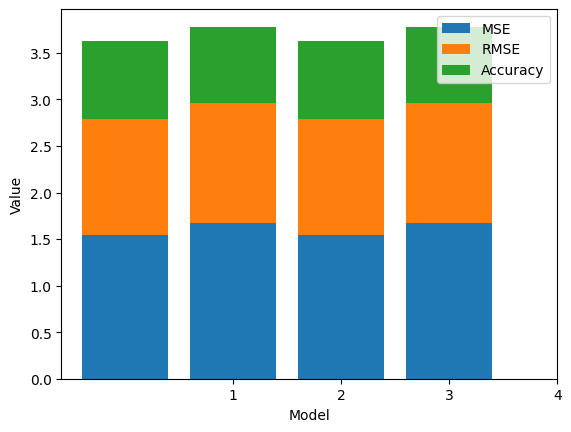

In [ ]:
import matplotlib.pyplot as plt

# Example values for MSE, RMSE, and R-squared
MSE = [1.546612040982713, 1.6689386241473305, 1.5483918030329988, 1.6682278956513765]
RMSE = [1.2436285783877408, 1.2918740744156647, 1.2443439247382528, 1.2915989685855964]
Accuracy = [0.833, 0.820, 0.833, 0.820]

# Create the graph
plt.bar(range(4), MSE, label='MSE')
plt.bar(range(4), RMSE, label='RMSE', bottom=MSE)
plt.bar(range(4), Accuracy, label='Accuracy', bottom=[i+j for i,j in zip(MSE,RMSE)])

# Add axis labels and a legend
plt.xlabel('Model')
plt.ylabel('Value')
plt.legend()

# Add x-tick labels
plt.xticks([1, 2, 3, 4])

# Show the graph representing the model performance
plt.show()


<Axes: xlabel='School Performance'>

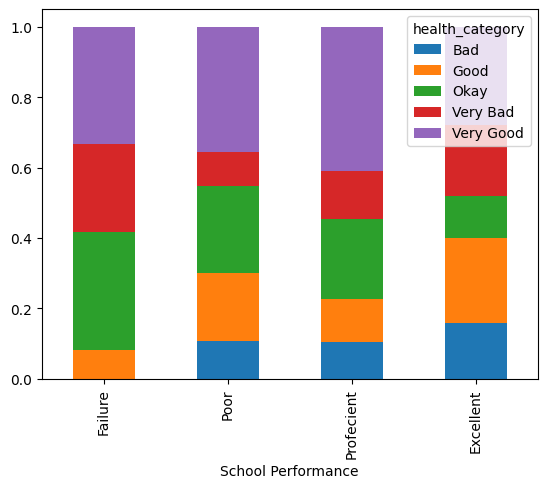

In [ ]:
crosstab_norm1.plot(kind='bar', stacked =True)

<Axes: xlabel='School Performance'>

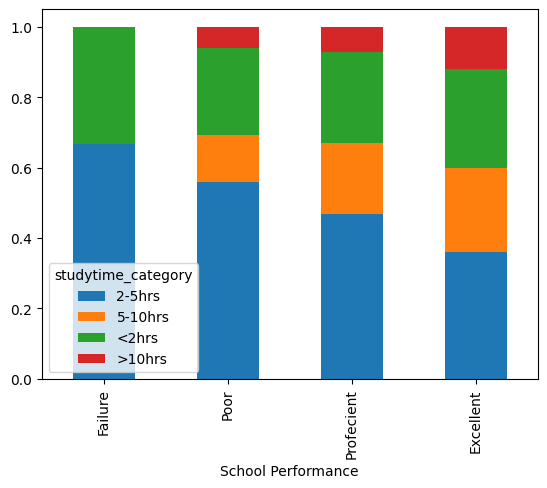

In [ ]:
crosstab_norm2.plot(kind='bar', stacked =True)

<Axes: xlabel='School Performance'>

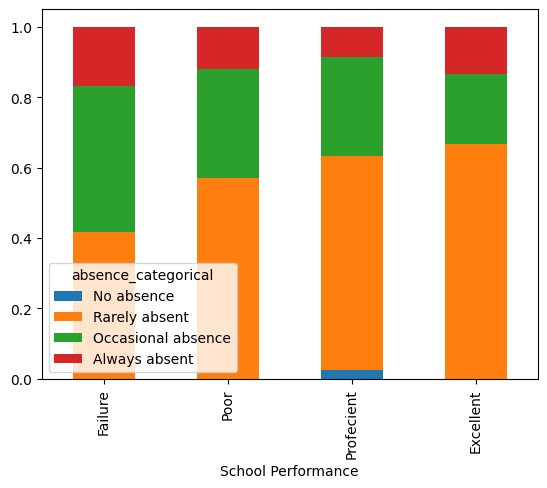

In [ ]:
crosstab_norm3.plot(kind='bar', stacked =True)

**Findings Discussion**

The most useful findings that we have are: First, the low negative colleration of Student Grades and Health. Second, is the Absences and Grade 1 being the best predictor variables for predicting the average of Grade 2 and 3. Third, is the highest correlation value to Grades being studytime, failures, and absences. Lastly, is the small difference between the models that we created using different variables as shown by the first bar graph above in this section.

The first findings can be used by researchers trying to determine the factors that affect a students mental health. According to the dataset we have and the calculations that we have, it didn't matter as much as we expected.

The second findings can be used as an advice to students that absences have a lot of impact on their grades. Absences being the best predictor variable out of Health and Study Time means that it matters a lot to our dependent variable Grade 2 and 3.

The third findings can be used to figure out the highest factors for a students grade. The correlation of Study Time, Failures, and Absences means that they matter a lot in terms of their affects on grades. Their correlation values are significant enough to affect students' grades.

The last findings means that any of the four models (Model 1, Model 2, Model 3, Model 4) can be used without affecting the performance of the model too much. If only one data is available (for example only study time is available), this can be used without worrying too much about model performance.

In the cross-tabulations done earlier, the observable trends and patterns between the variables are also useful findings.

The bar graph for health and school performance indicates that very good health is close to being evenly distributed between each category.However, we could see the red which indicates the "Very Bad" health, shows an increase whenever students' school performance lies around the failing or excellent. This is a key finding that shows a pattern on a factor that affects a students mental health.

The bar graph for studytime and school performance indicates that the more students study, the higher their school performance get. We can see a trend of the red and orange, which is more than 10 hours and 5-10 hours of studying, increase whenever their school performance also increase. This findings can be used by researchers or teachers to understand the right amount of studytime for students to adequately study and perform well in school.

The bar graph for absences and school performance indicates a trend of the rarely absent students getting higher as school performance gets better. On the other hand, the occasional absent students goes lower as school performance gets better. This finding can be used by researchers to find the optimal amount of absences a student can have without affecting their grade too much. This can also be used by the school as a reference to the rules on absences they have.

**Recommendations / Suggestions for Future Studies**

In our data science project, we learned how the different factors of health, studytime, and absences can impact the academic performance of a student. However, many of these variables we used showed weak correlation with one another. But in looking at the visualization, we can observe some trends and patterns on the factors affecting the students' academic performance. We can see this in our interpreation of graphs in our data visualization. The small dataset we had to work with made correlation weak because of how the distribution of data are for each of the categories making observable patterns harder to notice. In extending the dataset through searching for similar datasets that gathers students' performance in academics, we can consolidate these datasets and make a larger dataset. As there are  many features we did not include to the factors that affected the students' academic performance, we can also suggest using those other factors such as availability of internet, familysize, and/or alchohol consumption.

**References**

**Literature about our dataset:**
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

**Codes**
Larose, C. D., & Larose, D. T. Data science using Python and R. Wiley 1st Edition. 2019
https://www.w3schools.com/python/python_ml_linear_regression.asp


**Dataset source**
https://www.kaggle.com/datasets/devansodariya/student-performance-data